In [1]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

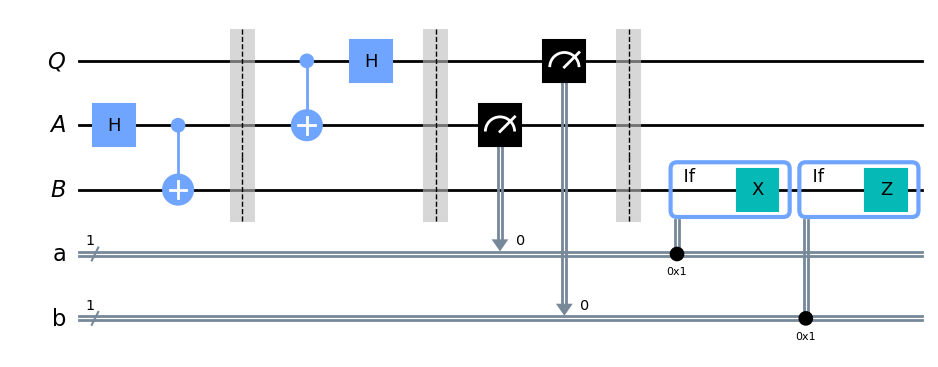

In [24]:
qubit = QuantumRegister(1,"Q")
ebit0 = QuantumRegister(1,"A")
ebit1 = QuantumRegister(1,"B")

a = ClassicalRegister(1,"a")
b = ClassicalRegister(1,"b")

circuit = QuantumCircuit(qubit, ebit0, ebit1, a, b)

## Bell +
circuit.h(ebit0)
circuit.cx(ebit0, ebit1)
circuit.barrier()

# Alice operations
circuit.cx(qubit, ebit0)
circuit.h(qubit)
circuit.barrier()

# Alice's measures
circuit.measure(ebit0, a)
circuit.measure(qubit, b)
circuit.barrier()

# Bob's operations
with circuit.if_test((a,1)):
    circuit.x(ebit1)
with circuit.if_test((b,1)):
    circuit.z(ebit1)

display(circuit.draw("mpl"))

In [25]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(random_gate.to_matrix())

array([[-0.11099372+0.j        ,  0.61270109-0.7824818j ],
       [ 0.56356388+0.81858179j,  0.11078483+0.00680646j]])

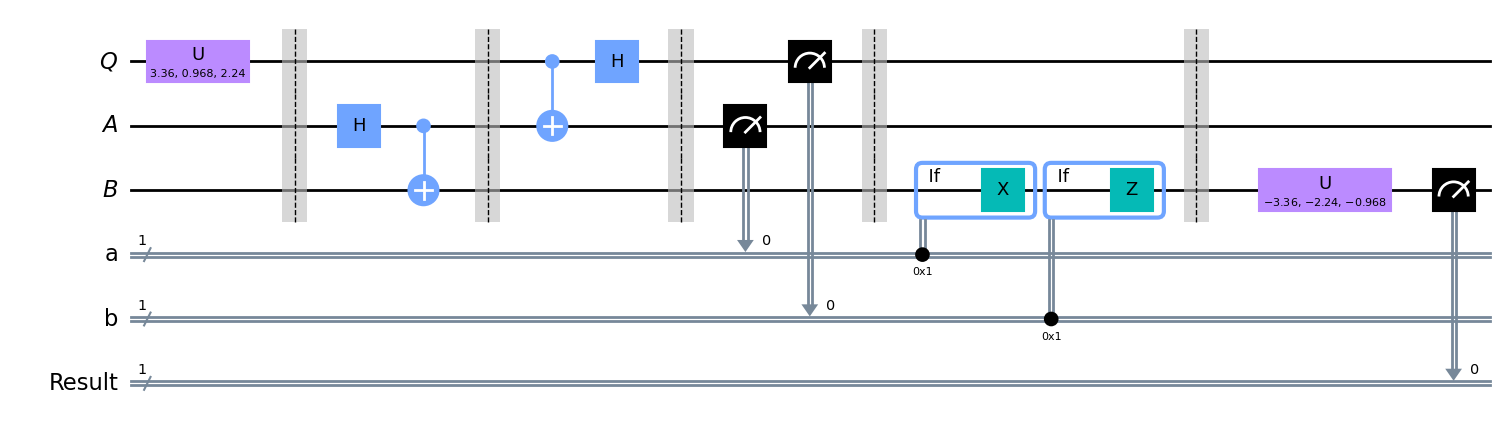

In [26]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(circuit)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw("mpl"))

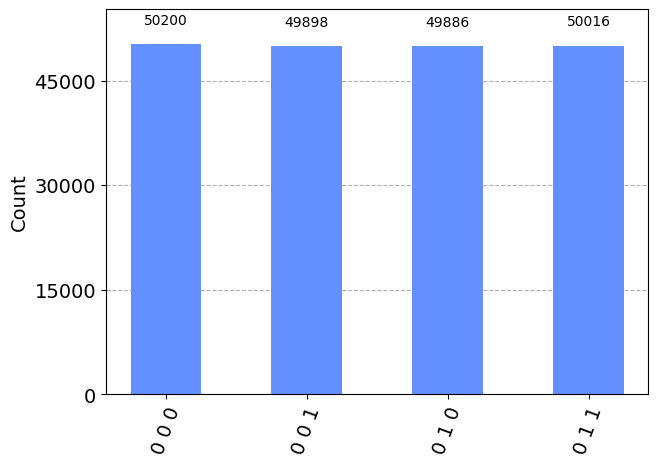

In [30]:
result = AerSimulator().run(test, shots=200000).result()
statistics = result.get_counts()
display(plot_histogram(statistics))